Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [8]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [9]:
#import file
startsup=pd.read_csv("E:\\DATA SCIENCE\\LMS\\50_Startups.csv")

In [10]:
startsup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
#EDA
startsup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
data=startsup.rename({"R&D Spend":"RS","Marketing Spend":"MS"},axis=1)

In [13]:

# checking nulls value
data.isna().sum()

RS                0
Administration    0
MS                0
State             0
Profit            0
dtype: int64

In [14]:
data.corr()

,RS,Administration,MS,Profit
RS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


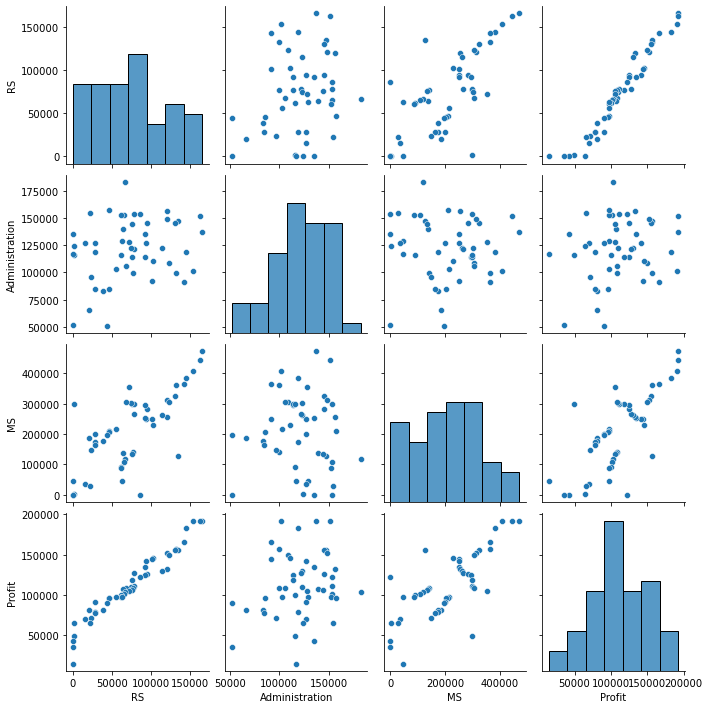

In [15]:
sn.pairplot(data)

In [16]:
model=smf.ols("Profit~RS+Administration+MS",data=data).fit()

In [17]:
#coefficient of parameter
model.params

Intercept         50122.192990
RS                    0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [18]:
#R squared value
(model.rsquared,model.aic)

(0.9507459940683246, 1058.7714985998055)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           4.53e-30
Time:                        23:40:09   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RS                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS                 0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#buid SLR AND MLR for Administration& MS
model_1=smf.ols("Profit~MS",data=data).fit()

In [21]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           4.38e-10
Time:                        23:40:09   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
(model_1.rsquared,model_1.aic)

(0.5591535746115516, 1164.3567921009328)

In [23]:
model_2=smf.ols("Profit~Administration",data=data).fit()

In [24]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 22 Feb 2022   Prob (F-statistic):              0.162
Time:                        23:40:09   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
(model_2.rsquared,model_2.aic)

(0.04028714077757245, 1203.2536701858014)

In [26]:
model_3=smf.ols("Profit~Administration+MS",data=data).fit()

In [27]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.50e-10
Time:                        23:40:10   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
MS                 0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
(model_3.rsquared,model_3.aic)

(0.6097229746770663, 1160.2648038638672)

In [29]:
# check all R square values choose final model as which has least model.aic and high model Rsquared values.
(model.rsquared,model.aic),(model_1.rsquared,model_1.aic),(model_2.rsquared,model_2.aic),(model_3.rsquared,model_3.aic)

((0.9507459940683246, 1058.7714985998055),
 (0.5591535746115516, 1164.3567921009328),
 (0.04028714077757245, 1203.2536701858014),
 (0.6097229746770663, 1160.2648038638672))

In [30]:
#Model DSeletion Diagnostics
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

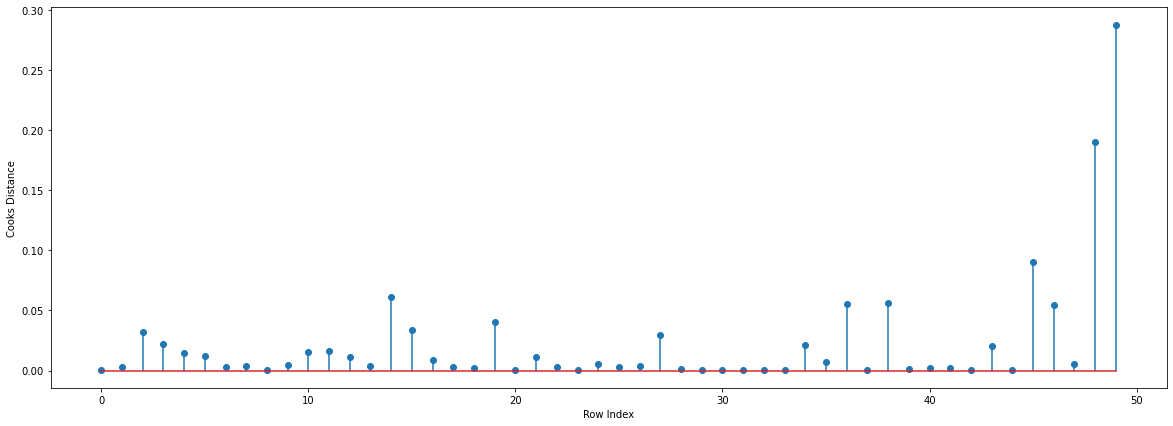

In [31]:
#let's  plot stemplot.
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
np.argmax(c),np.max(c)

(49, 0.28808229275432623)

In [33]:
#improving model
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)

In [34]:
data1

,RS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [35]:
model_4=smf.ols("Profit~RS+Administration+MS",data=data1).fit()

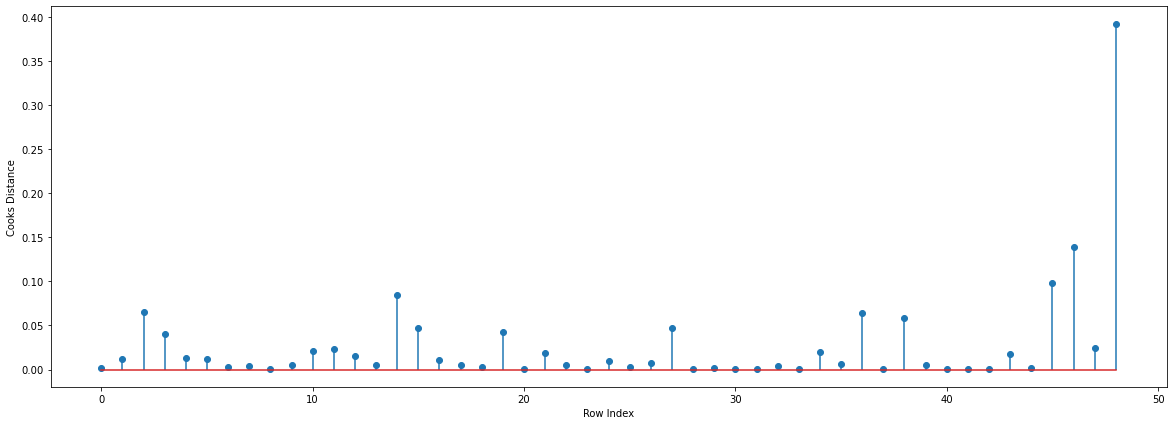

In [36]:
model_influence=model_4.get_influence()
(c,_)=model_influence.cooks_distance
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
# MAX(c)Thus final model accurancy 
(model_4.rsquared,model_4.aic)

(0.9613162435129847, 1020.5652974526367)

In [38]:
#check model prediction of profit
new_data=pd.DataFrame({"RS":70000,"Administration":90000,"MS":140000},index=[0])
new_data

,RS,Administration,MS
0,70000,90000,140000


In [39]:
# manual prediction of price
model_4.predict(new_data)

0    108727.154753
dtype: float64

In [40]:
# Automatic prediction of price
model_4.predict(data1)

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [41]:
# Rsquare values of both model
(model.rsquared,   model_4.rsquared)

(0.9507459940683246, 0.9613162435129847)

Q:2
Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [42]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sfm
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
#Import file
toyota1=pd.read_csv("E:\DATA SCIENCE\LMS\Toyoto_Corrola.csv")

In [44]:
toyota1
toyota1.shape

(1436, 10)

In [45]:
#drop columns
toyota2=toyota1.iloc[:,[2,3,4,5,6,7,8,9]]
toyota2

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [46]:
#Rename columns
toyota3=toyota2.rename({"Age_08_04":"age"},axis=1)

In [47]:
#describe Data set
toyota3.describe()

,Price,age,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


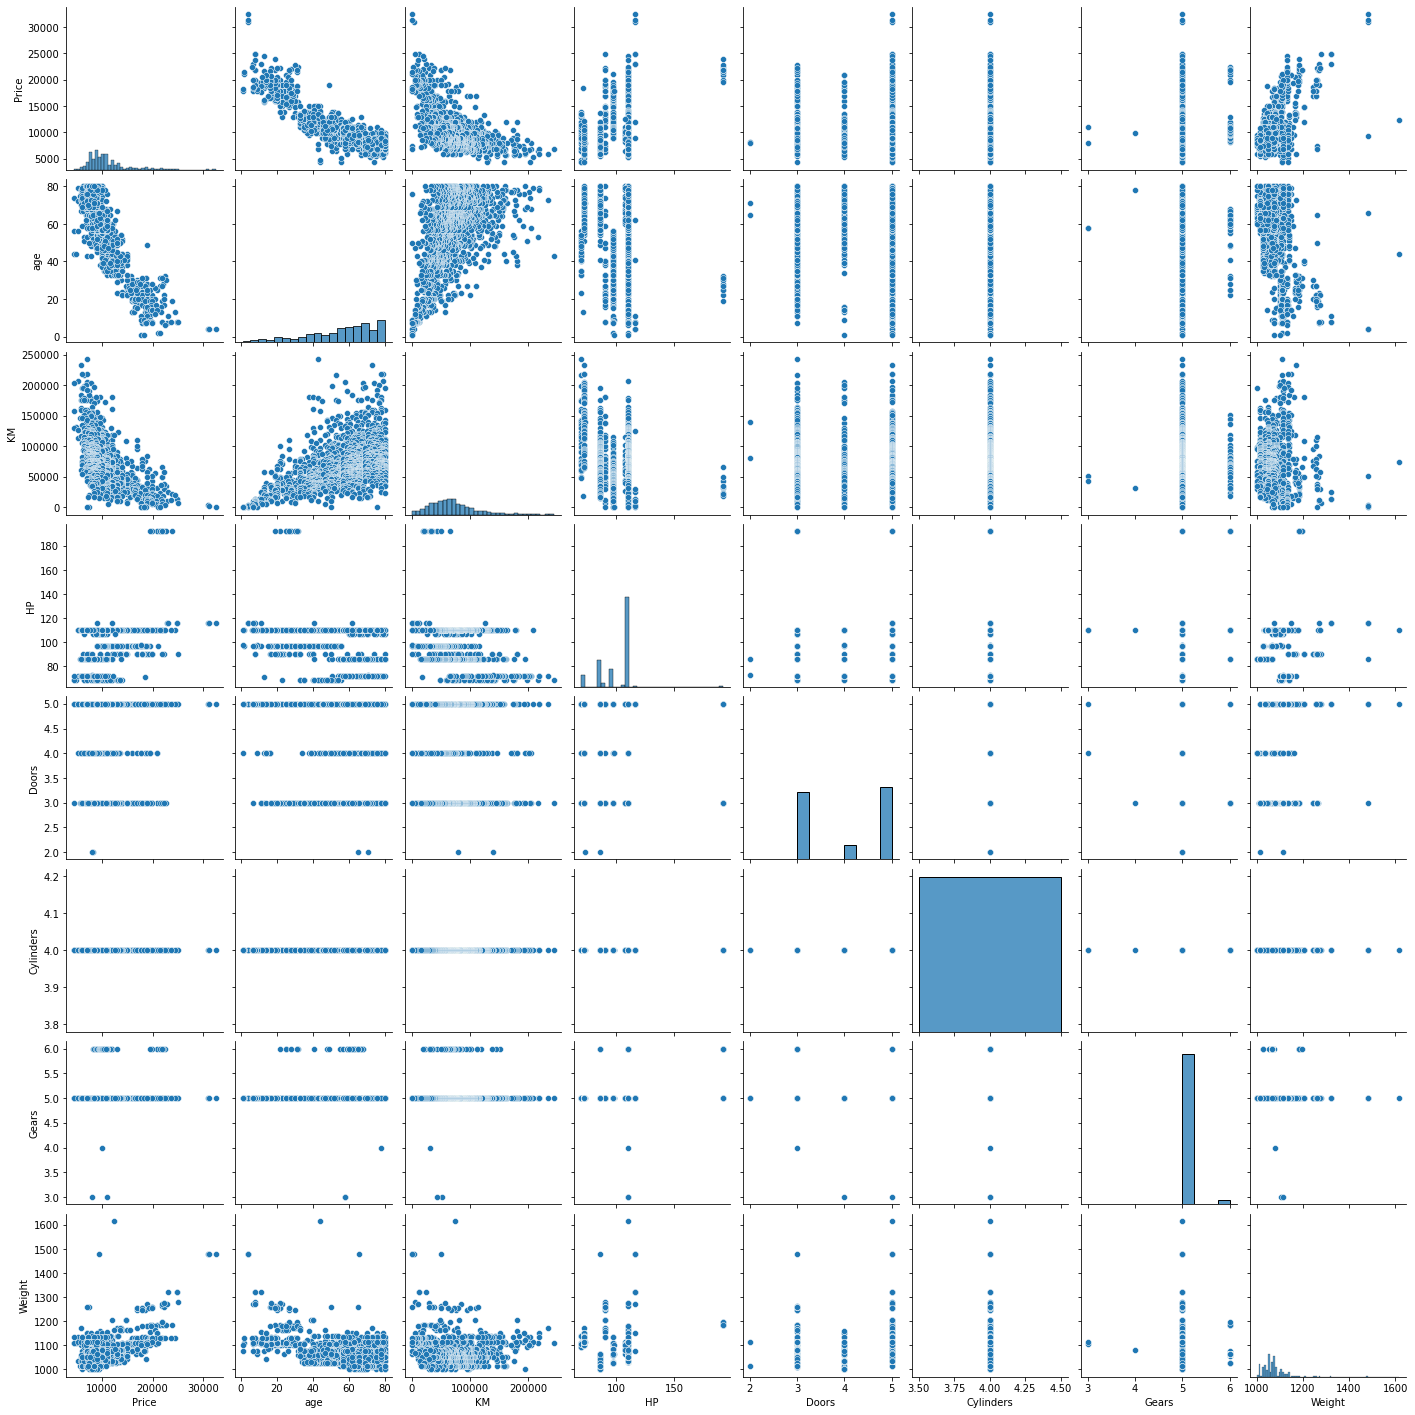

In [48]:
#plot pairplot
sn.pairplot(toyota3)

In [49]:
toyota3

,Price,age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [50]:
model_f1=smf.ols("Price~age+KM+HP+Doors+Cylinders+Gears+Weight",data=toyota3).fit()

In [51]:
model_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:40:28   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.8455     77.179     -5.323      0.000    -562.241    -259.450
age         -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Cylinders  -1643.3820    308.714     -5.323      0.000   -2248.964   -1037.800
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     7.47e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
model_d=smf.ols("Price~Doors",data=toyota3).fit()

In [53]:
#checked summary Doors
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.46e-12
Time:                        23:40:29   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As per p value variable of doors is significantS

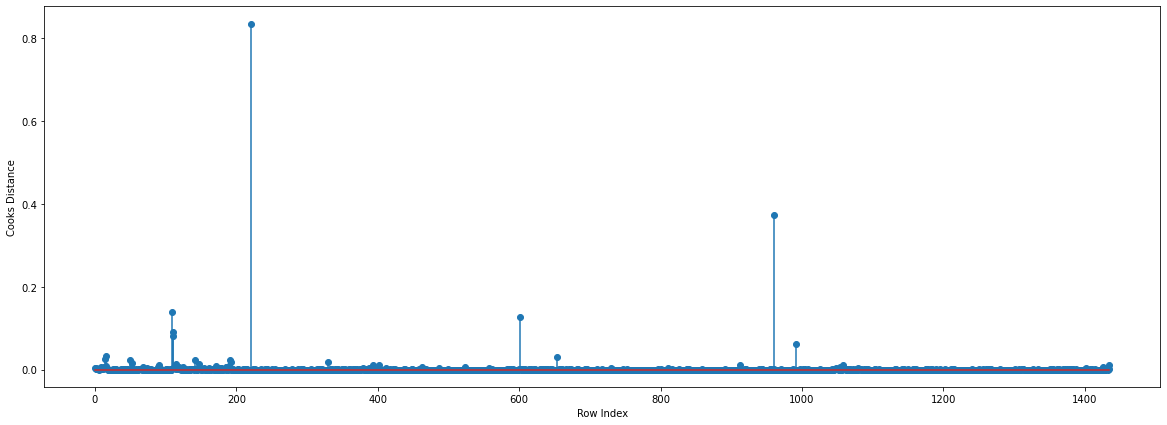

In [54]:
#Model deletion diagnostics
model_influence_f1=model_f1.get_influence()
(c,_)=model_influence_f1.cooks_distance
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
np.argmax(c),np.max(c)

(221, 0.8359007508852095)

In [56]:
toyota4=toyota3.drop([221],axis=0)

In [57]:
model_f2=smf.ols("Price~age+KM+HP+Doors+Cylinders+Gears+Weight",data=toyota4).fit()

In [58]:
model_f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1573.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:40:29   Log-Likelihood:                -12341.
No. Observations:                1435   AIC:                         2.470e+04
Df Residuals:                    1428   BIC:                         2.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -537.7493     77.221     -6.964      0.000    -689.228    -386.270
age         -119.1448      2.590    -45.996      0.000    -124.226    -114.064
KM            -0.0207      0.001    -17.442      0.000      -0.023      -0.018
HP            28.1812      2.560     11.009      0.000      23.160      33.202
Doors        -29.6227     39.230     -0.755      0.450    -106.577      47.331
Cylinders  -2150.9972    308.885     -6.964      0.000   -2756.914   -1545.081
Gears        594.7431    193.282      3.077      0.002     215.596     973.890
Weight        20.7316      0.854     24.265      0.000      19.056      22.408
==============================================================================
Omnibus:                      156.861   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.802
Skew:                          -0.288   Prob(JB):                    3.48e-212
Kurtosis:                       6.994   Cond. No.                     3.76e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

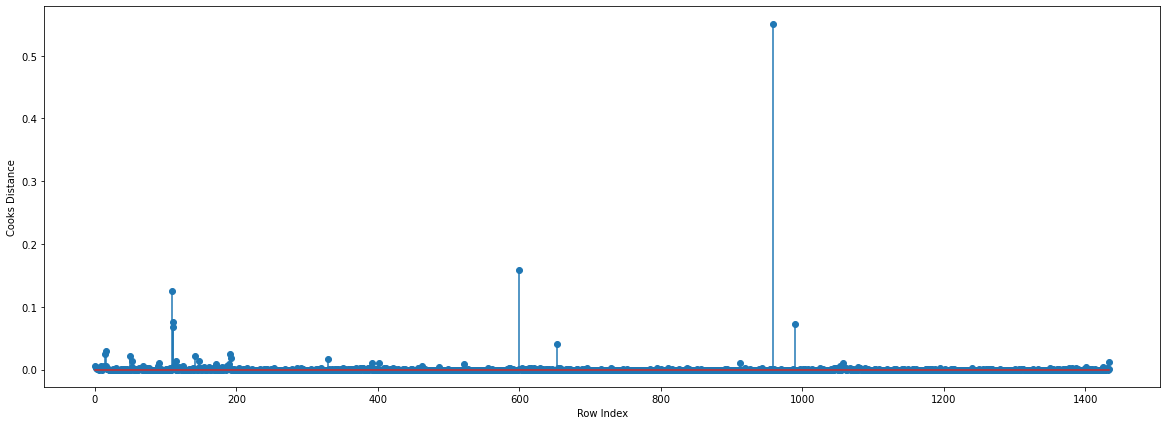

In [59]:
#Model deletion diagnostics
model_influence_f2=model_f2.get_influence()
(c,_)=model_influence_f2.cooks_distance
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
np.argmax(c),np.max(c)

(959, 0.5505715012222797)

In [61]:
toyota5=toyota4.drop([959],axis=0)

In [62]:
model_f3=smf.ols("Price~age+KM+HP+Doors+Cylinders+Gears+Weight",data=toyota5).fit()

In [63]:
model_f3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1574.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:40:30   Log-Likelihood:                -12332.
No. Observations:                1434   AIC:                         2.468e+04
Df Residuals:                    1427   BIC:                         2.472e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -538.1998     77.201     -6.971      0.000    -689.640    -386.760
age         -119.0885      2.590    -45.980      0.000    -124.169    -114.008
KM            -0.0207      0.001    -17.465      0.000      -0.023      -0.018
HP            28.2107      2.559     11.023      0.000      23.191      33.231
Doors        -28.2345     39.233     -0.720      0.472    -105.195      48.726
Cylinders  -2152.7993    308.805     -6.971      0.000   -2758.559   -1547.039
Gears        594.5695    193.230      3.077      0.002     215.524     973.615
Weight        20.7313      0.854     24.272      0.000      19.056      22.407
==============================================================================
Omnibus:                      157.177   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              977.577
Skew:                          -0.289   Prob(JB):                    5.27e-213
Kurtosis:                       7.003   Cond. No.                     3.72e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

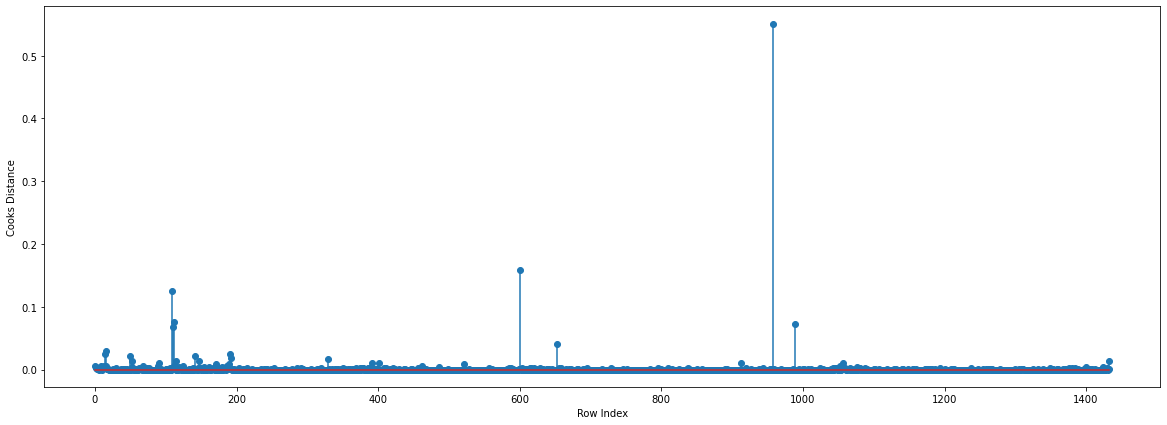

In [64]:
#Model deletion diagnostics
model_influence_f3=model_f3.get_influence()
(c,_)=model_influence_f3.cooks_distance
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota5)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [65]:
np.argmax(c),np.max(c)

(958, 0.5508943679572208)

In [66]:
toyota6=toyota5.drop([958],axis=0)

In [67]:
model_f4=smf.ols("Price~age+KM+HP+Doors+Cylinders+Gears+Weight",data=toyota6).fit()

In [68]:
model_f4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1573.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:40:31   Log-Likelihood:                -12324.
No. Observations:                1433   AIC:                         2.466e+04
Df Residuals:                    1426   BIC:                         2.470e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -538.7497     77.235     -6.975      0.000    -690.257    -387.243
age         -119.0985      2.591    -45.969      0.000    -124.181    -114.016
KM            -0.0207      0.001    -17.444      0.000      -0.023      -0.018
HP            28.2418      2.561     11.028      0.000      23.218      33.266
Doors        -27.9345     39.251     -0.712      0.477    -104.931      49.062
Cylinders  -2154.9987    308.941     -6.975      0.000   -2761.027   -1548.971
Gears        594.5085    193.286      3.076      0.002     215.352     973.665
Weight        20.7356      0.854     24.268      0.000      19.060      22.412
==============================================================================
Omnibus:                      156.879   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              974.684
Skew:                          -0.289   Prob(JB):                    2.24e-212
Kurtosis:                       6.999   Cond. No.                     2.39e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

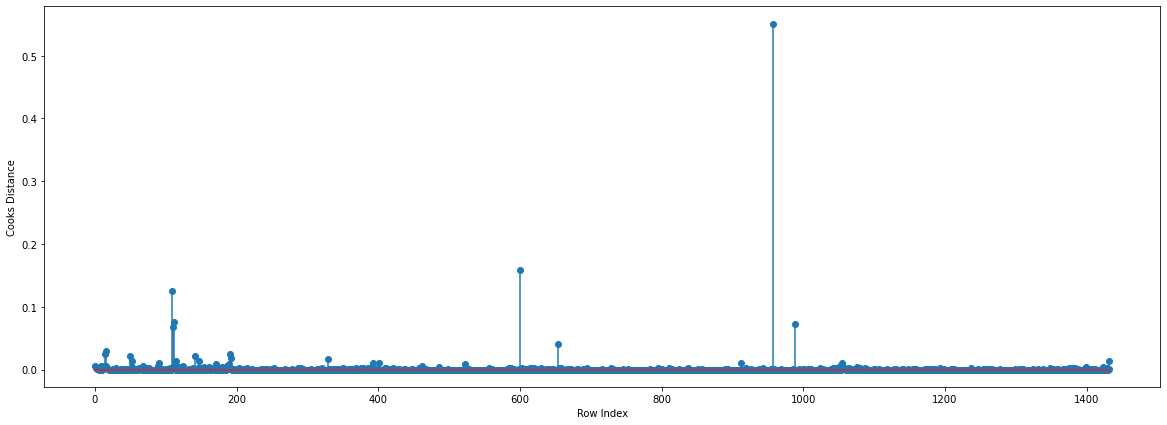

In [69]:
#Model deletion diagnostics
model_influence_f4=model_f4.get_influence()
(c,_)=model_influence_f4.cooks_distance
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota6)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
np.argmax(c),np.max(c)

(957, 0.550613555283634)

In [71]:
toyota7=toyota6.drop([957],axis=0)

In [72]:
model_f5=smf.ols("Price~age+KM+HP+Doors+Cylinders+Gears+Weight",data=toyota7).fit()

In [73]:
model_f5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1572.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:40:32   Log-Likelihood:                -12316.
No. Observations:                1432   AIC:                         2.465e+04
Df Residuals:                    1425   BIC:                         2.468e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -539.3663     77.285     -6.979      0.000    -690.971    -387.761
age         -119.0953      2.592    -45.952      0.000    -124.179    -114.011
KM            -0.0207      0.001    -17.431      0.000      -0.023      -0.018
HP            28.2668      2.563     11.028      0.000      23.239      33.295
Doors        -28.1036     39.267     -0.716      0.474    -105.132      48.925
Cylinders  -2157.4653    309.141     -6.979      0.000   -2763.885   -1551.045
Gears        594.0965    193.352      3.073      0.002     214.811     973.382
Weight        20.7448      0.855     24.256      0.000      19.067      22.422
==============================================================================
Omnibus:                      156.694   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.786
Skew:                          -0.289   Prob(JB):                    5.78e-212
Kurtosis:                       6.996   Cond. No.                     3.45e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

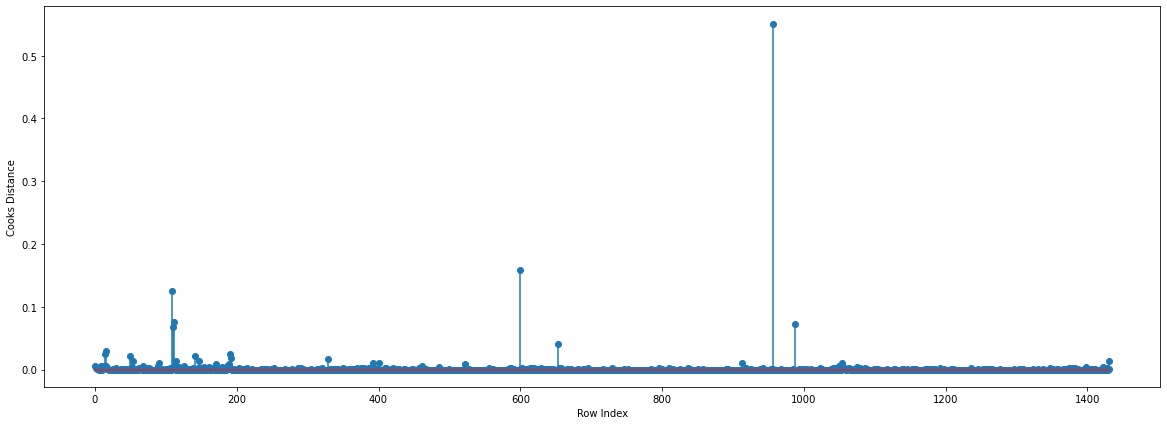

In [74]:
#Model deletion diagnostics
model_influence_f5=model_f5.get_influence()
(c,_)=model_influence_f5.cooks_distance
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota7)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [75]:
np.argmax(c),np.max(c)

(956, 0.5511170025605262)

In [76]:
toyota8=toyota7.drop([956],axis=0)

In [77]:
model_f6=smf.ols("Price~age+KM+HP+Doors+Cylinders+Gears+Weight",data=toyota8).fit()

In [78]:
model_f6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1571.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:40:33   Log-Likelihood:                -12308.
No. Observations:                1431   AIC:                         2.463e+04
Df Residuals:                    1424   BIC:                         2.467e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -544.2774     78.717     -6.914      0.000    -698.691    -389.864
age         -119.1107      2.593    -45.937      0.000    -124.197    -114.024
KM            -0.0207      0.001    -17.428      0.000      -0.023      -0.018
HP            28.1968      2.573     10.961      0.000      23.150      33.243
Doors        -27.6073     39.308     -0.702      0.483    -104.715      49.501
Cylinders  -2177.1097    314.868     -6.914      0.000   -2794.765   -1559.454
Gears        613.9202    202.453      3.032      0.002     216.782    1011.058
Weight        20.7352      0.856     24.224      0.000      19.056      22.414
==============================================================================
Omnibus:                      156.199   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.942
Skew:                          -0.287   Prob(JB):                    3.95e-211
Kurtosis:                       6.990   Cond. No.                     4.64e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Cooks Distance')

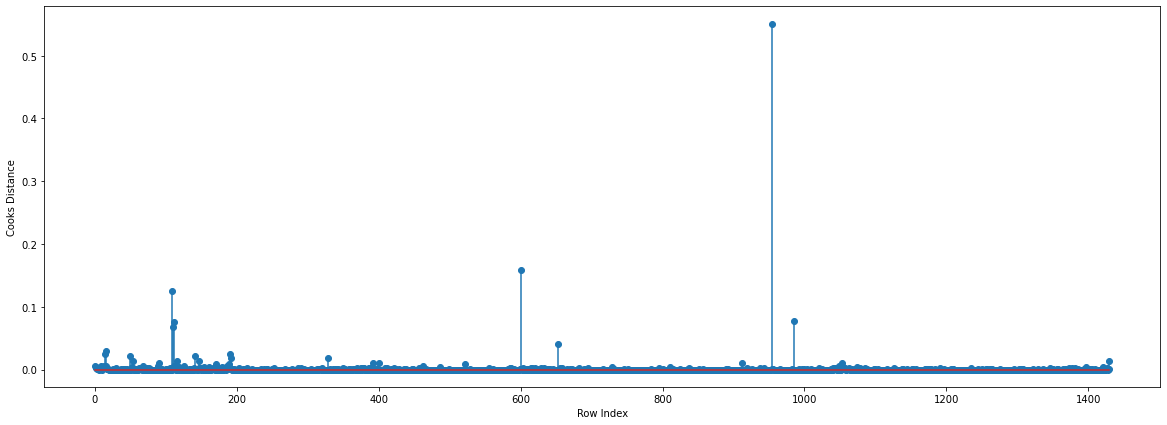

In [79]:
#Model deletion diagnostics
model_influence_f6=model_f6.get_influence()
(c,_)=model_influence_f6.cooks_distance
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota8)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [80]:
np.argmax(c),np.max(c)

(955, 0.5509442459843747)

In [162]:
toyota8=toyota7.drop([951,952,953,954,955,956],axis=0)

In [173]:
model_f7=smf.ols("Price~age+KM+HP+Doors+Cylinders+Gears+Weight",data=toyota8).fit()

In [174]:
model_f7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1572.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:24:17   Log-Likelihood:                -12264.
No. Observations:                1426   AIC:                         2.454e+04
Df Residuals:                    1419   BIC:                         2.458e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -540.6439     78.708     -6.869      0.000    -695.040    -386.248
age         -119.0961      2.592    -45.953      0.000    -124.180    -114.012
KM            -0.0207      0.001    -17.444      0.000      -0.023      -0.018
HP            28.4485      2.574     11.054      0.000      23.400      33.497
Doors        -30.0715     39.328     -0.765      0.445    -107.218      47.075
Cylinders  -2162.5757    314.831     -6.869      0.000   -2780.159   -1544.992
Gears        604.2374    202.379      2.986      0.003     207.243    1001.232
Weight        20.7122      0.856     24.203      0.000      19.033      22.391
==============================================================================
Omnibus:                      156.514   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              976.443
Skew:                          -0.289   Prob(JB):                    9.29e-213
Kurtosis:                       7.013   Cond. No.                     3.60e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Cooks Distance')

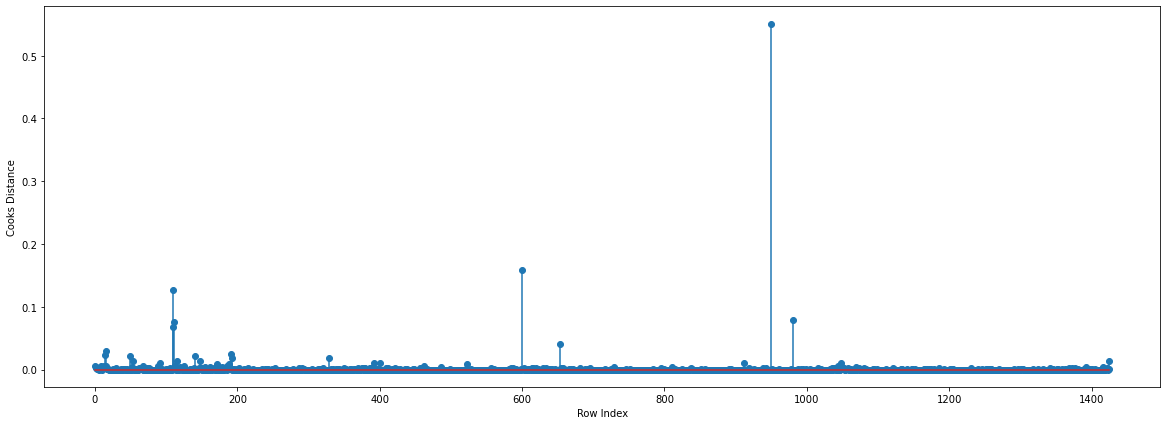

In [175]:
model_influence_f7=model_f7.get_influence()
(c,_)=model_influence_f7.cooks_distance
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota8)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [176]:
# AS WE CAN RAKE AS OUR MODEL WITH Rsquared
model_f7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1572.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:24:18   Log-Likelihood:                -12264.
No. Observations:                1426   AIC:                         2.454e+04
Df Residuals:                    1419   BIC:                         2.458e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -540.6439     78.708     -6.869      0.000    -695.040    -386.248
age         -119.0961      2.592    -45.953      0.000    -124.180    -114.012
KM            -0.0207      0.001    -17.444      0.000      -0.023      -0.018
HP            28.4485      2.574     11.054      0.000      23.400      33.497
Doors        -30.0715     39.328     -0.765      0.445    -107.218      47.075
Cylinders  -2162.5757    314.831     -6.869      0.000   -2780.159   -1544.992
Gears        604.2374    202.379      2.986      0.003     207.243    1001.232
Weight        20.7122      0.856     24.203      0.000      19.033      22.391
==============================================================================
Omnibus:                      156.514   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              976.443
Skew:                          -0.289   Prob(JB):                    9.29e-213
Kurtosis:                       7.013   Cond. No.                     3.60e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [181]:
#check model prediction of profit
new_data=pd.DataFrame({"age":24,"KM":45687,"HP":90,"Doors":5,"Cylinders":4,"Gears":5,"Weight":1170},index=[0])
new_data


,age,KM,HP,Doors,Cylinders,Gears,Weight
0,24,45687,90,5,4,5,1170


In [182]:
toyota8

,Price,age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [188]:
#Checking model
model_f7.predict(new_data)
print("Here predicted price of giver new_data set is ",model_f7.predict(new_data))

Here predicted price of giver new_data set is  0    16668.626493
dtype: float64
